<a href="https://colab.research.google.com/github/V1N015/CCINSYSL_ASSIGNMENT_COM-DF211/blob/main/Rivarez_exercise_5_b.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 5 B

In [176]:
import numpy as np
from sklearn.datasets import fetch_olivetti_faces
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier

In [177]:
faces = fetch_olivetti_faces()

In [178]:
faces.data.shape

(400, 4096)

In [179]:
faces.images.shape

(400, 64, 64)

In [180]:
faces.target.shape

(400,)

In [181]:
faces.target[200]

20

#### 1. Plot the image of index zero

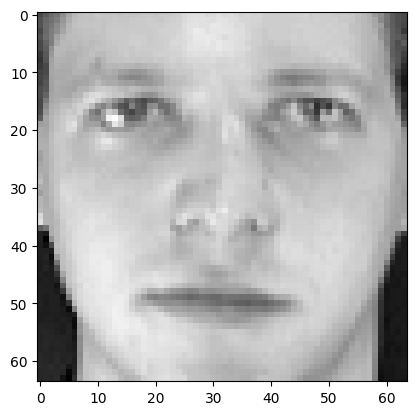

In [182]:
# put your answer here
plt.figure()
plt.imshow(faces.images[0], cmap=plt.cm.gray)

#### 2. Create a subplot of 10 images in a 3x3 configuration

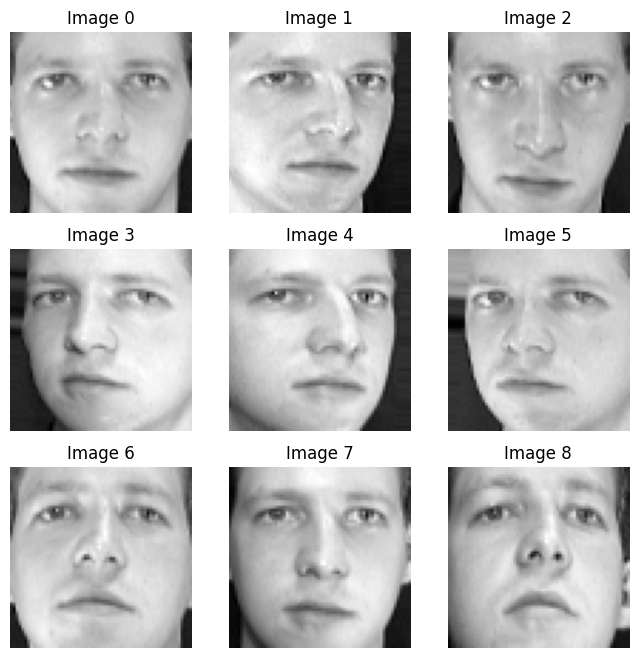

In [183]:
# put your answer here
fig, axes = plt.subplots(3, 3, figsize=(8, 8))
for i in range(9):
  ax = axes[i // 3, i % 3]
  ax.imshow(faces.images[i], cmap=plt.cm.gray)
  ax.set_title(f"Image {i}")
  ax.axis('off')
plt.show()

#### 3. Split the data into a training and test set

In [184]:
# put your answer here
train_img, test_img, train_lbl, test_lbl = train_test_split(
    faces.data, faces.target, test_size=1/7.0, random_state=0)

#### 4. Create a new instance of the LogisticRegression class

In [185]:
# put your answer here
logisticReg = LogisticRegression()

#### 5. Train the model using the training set using the `fit()` function

In [186]:
# put your answer here
logisticReg.fit(train_img, train_lbl)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

#### 6. Use the test data to test the model using the `predict()` function

In [187]:
# put your answer here
pred = logisticReg.predict(test_img)

#### 7. Get the accuracy using the `score()` function

In [188]:
# put your answer here
score = logisticReg.score(test_img, test_lbl)
print(score)

0.9655172413793104


#### 8. Collect all the misclassified images and create a plot for visualization

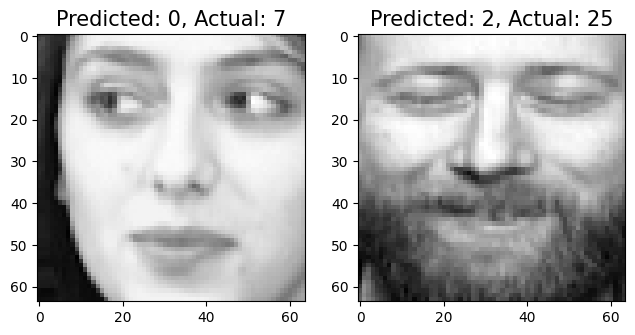

In [196]:
# put your answer here
index = 0
misclassifiedIndexes = []
for label, predict in zip(test_lbl, pred):
    if label != predict:
        misclassifiedIndexes.append(index)
    index +=1


plt.figure(figsize=(20,4))
for plotIndex, badIndex in enumerate(misclassifiedIndexes[0:5]):
  plt.subplot(1, 5, plotIndex + 1)
  plt.imshow(np.reshape(test_img[badIndex], (64,64)), cmap=plt.cm.gray)
  plt.title('Predicted: {}, Actual: {}'.format(pred[badIndex], test_lbl[badIndex]), fontsize = 15)

## Gradient Descent

#### 9. Use the `SGDClassifier()` to use gradient descent to minimize the loss

In [190]:
# put your answer here
classif = SGDClassifier(loss="log_loss", penalty="l2")

#### 10. Train the model using the training set using the `fit()` function

In [191]:
# put your answer here
classif.fit(train_img, train_lbl)

SGDClassifier(loss='log_loss')

#### 11. Use the test data to test the model using the `predict()` function

In [192]:
# put your answer here
classif.predict(test_img)

array([13, 30, 34, 19, 24,  6, 15, 26, 12, 21,  3, 13, 11,  9,  1,  5, 29,
        3, 20, 19, 17, 26, 12,  9, 17, 31,  0,  1, 28, 10, 17, 30, 33, 22,
        6,  7,  9, 17, 17, 39, 10, 32, 23, 29, 29,  5, 37, 25, 15, 23, 24,
       22, 29, 17, 28, 31,  5,  1])

#### 12. Get the accuracy using the `score()` function

In [193]:
# put your answer here
classifScore = classif.score(test_img, test_lbl)
print(classifScore)

0.8620689655172413


#### 13. Find the best number of iterations to get the best accuracy

Accuracy Score:  0.8275862068965517
Accuracy Score:  0.7758620689655172
Accuracy Score:  0.896551724137931


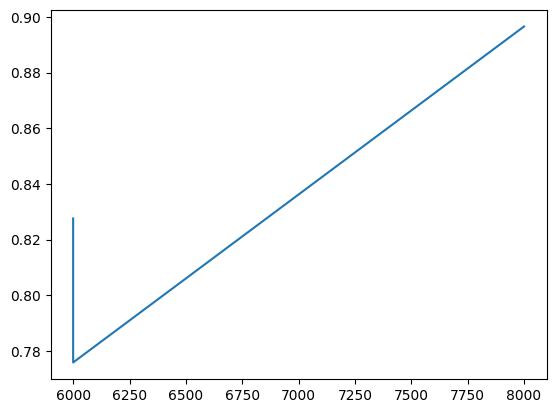

In [194]:
# put your answer here
num_iter = [6000, 6000, 8000]
scores = []
for i in num_iter:
  clf = SGDClassifier(loss="log_loss", penalty="l2", max_iter=i)
  clf.fit(train_img, train_lbl)
  y_pred = clf.predict(test_img)
  score = clf.score(test_img, test_lbl)
  scores.append(score)
  print("Accuracy Score: ", score)

plt.plot(num_iter, scores)
